In [1]:
# Objective : Prediction of survival rate using Titanic dataset through Logistic Regression

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading dataset

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


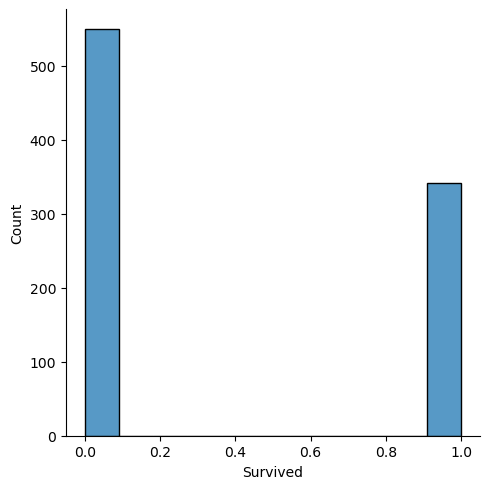

In [6]:
# Exploratory data analysis

# Categorical attributes
sns.displot(train['Survived'])

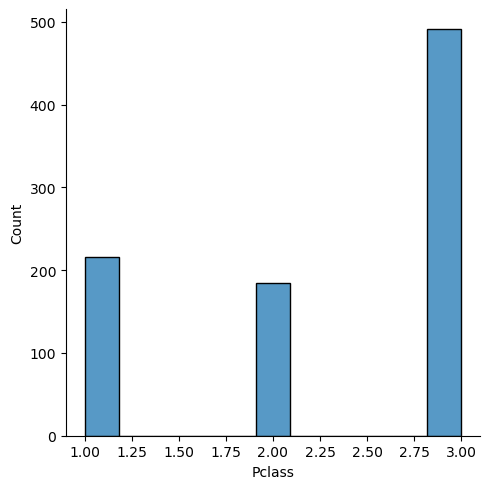

In [7]:
sns.displot(train['Pclass'])

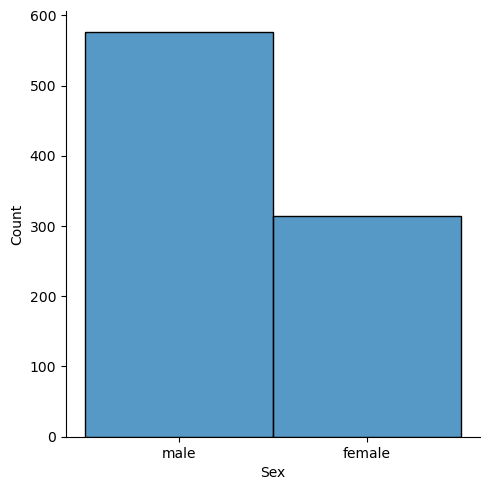

In [8]:
sns.displot(train['Sex'])

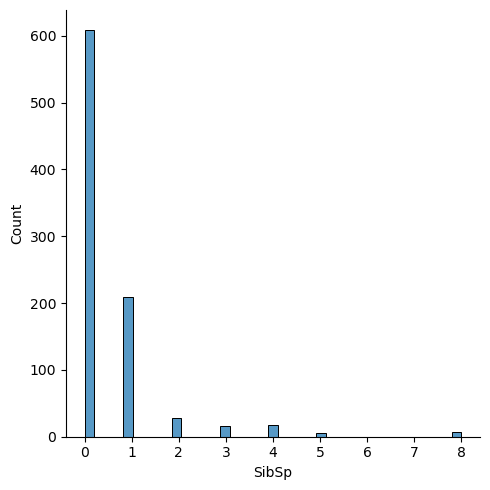

In [9]:
sns.displot(train['SibSp'])

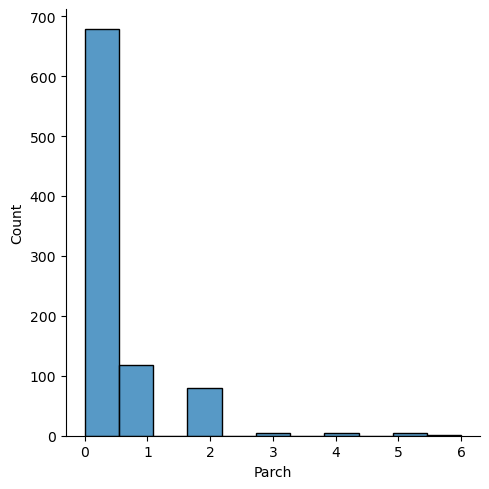

In [10]:
sns.displot(train['Parch'])

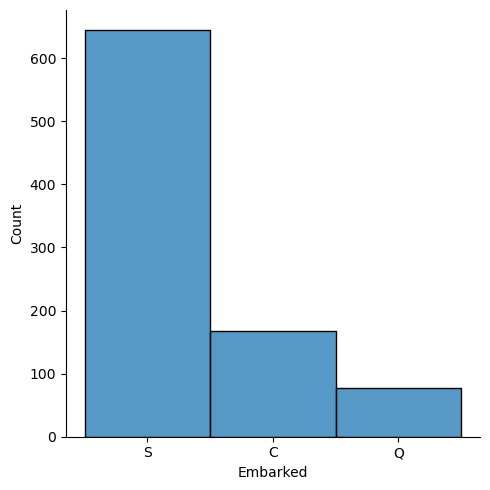

In [11]:
sns.displot(train['Embarked'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1140\4025994758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

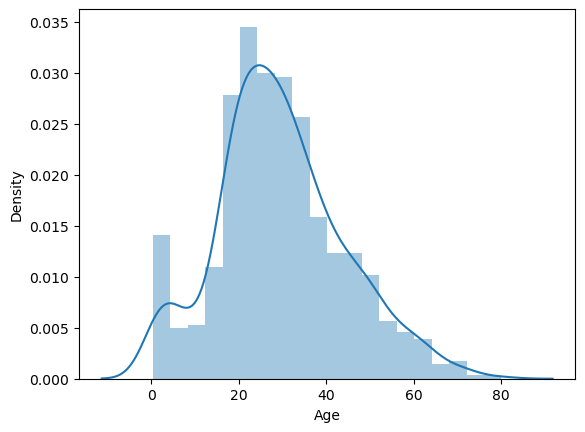

In [12]:
# Categorical attributes

sns.distplot(train['Age'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1140\891094164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

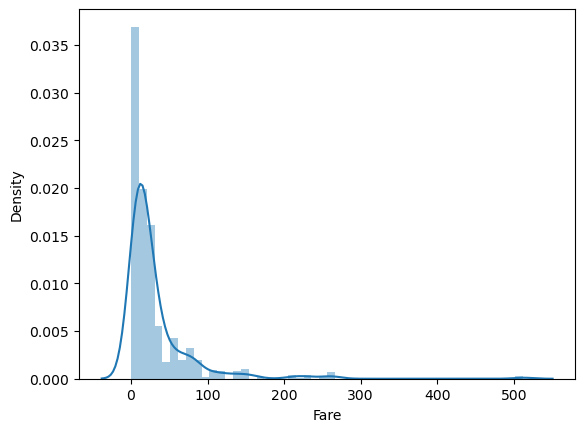

In [13]:
sns.distplot(train['Fare'])

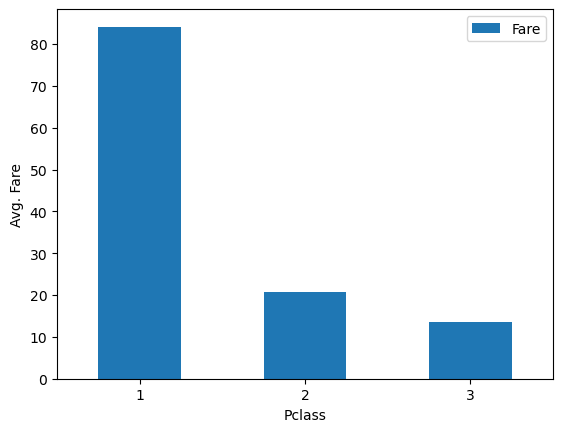

In [14]:
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

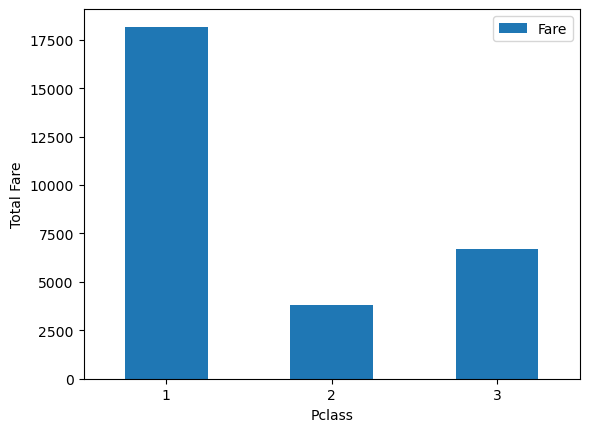

In [15]:
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

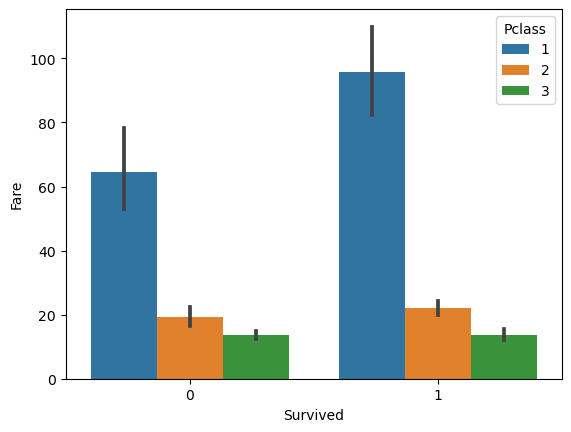

In [16]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

In [17]:
# Data preprocessing

train_len = len(train)
# Combine the dataframes
df = pd.concat([train,test],axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
# Finding null values

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
# Deleting unnecessary columns
df = df.drop(columns = ['Cabin'],axis=1)

In [21]:
# Fill missing values using mean of that column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
# Fill missing values using mode of that categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1140\3198019043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

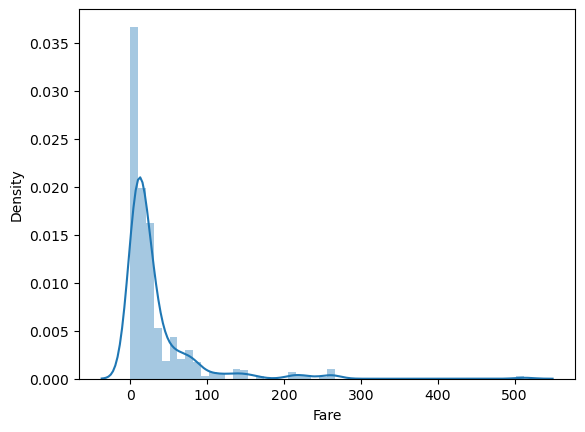

In [22]:
# Log transformation for uniform data distribution

sns.distplot(df['Fare'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1140\875707585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

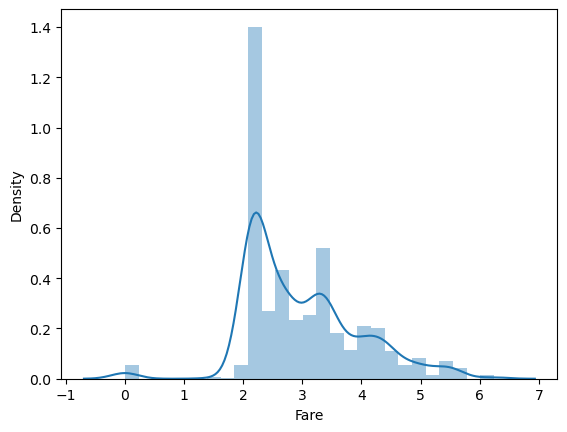

In [23]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'])

In [24]:
df = df.drop(columns = ['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [25]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


<Axes: >

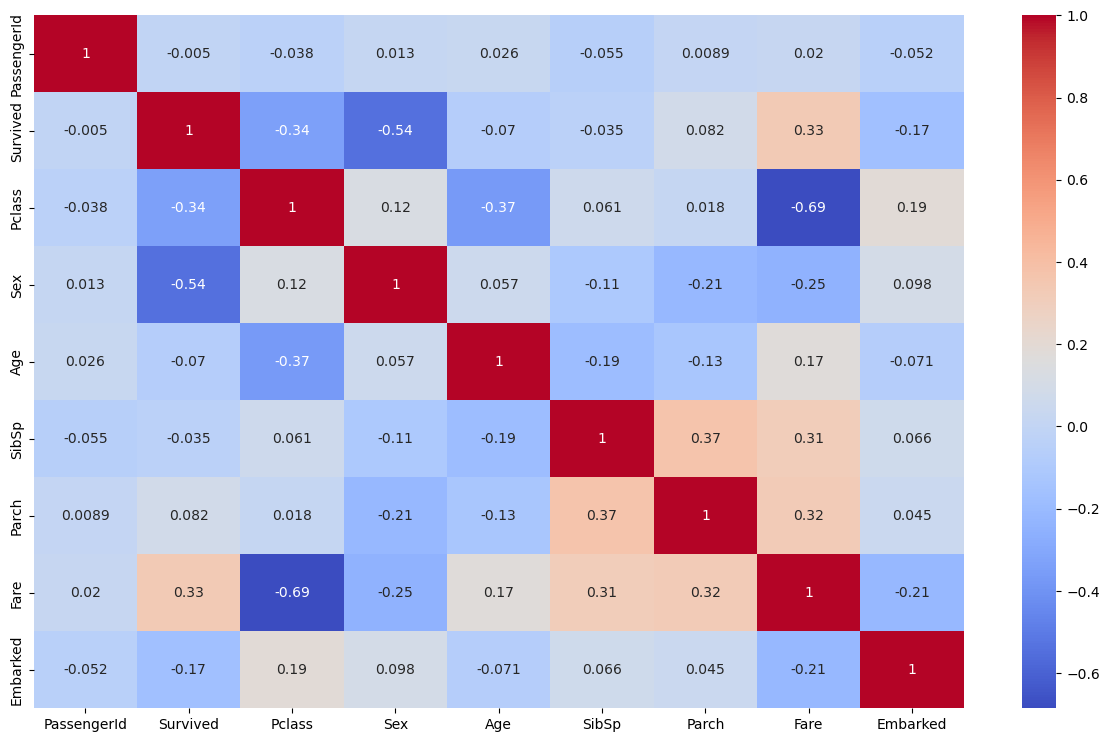

In [26]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
# Train Test split

train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [29]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [30]:
# Input split for train data

x = train.drop(columns = ['PassengerId','Survived'],axis=1)
y = train['Survived']

In [31]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [32]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [50]:
# Model training

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
pred_train = model.predict(x_test)
pred_train

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0.])

In [55]:
pd.DataFrame(confusion_matrix(y_test,pred_train),
             columns = ['Predicted No','Predicted Yes'],index = ['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,115,19
Actual Yes,24,65


In [52]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       134
         1.0       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [53]:
print('Accuracy:',model.score(x_test,y_test))
score = cross_val_score(model,x,y)
print("Score:",score)
print("CV Score:",np.mean(score))

Accuracy: 0.8071748878923767
Score: [0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
CV Score: 0.7833971502102819


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Input split for test data

x_test = test.drop(columns = ['PassengerId','Survived'],axis=1)

In [36]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [37]:
pred_test = model.predict(x_test)
pred_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [38]:
# Test submission

sub_test = pd.read_csv("gender_submission.csv")
sub_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
sub_test['Survived'] = pred_test
sub_test

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


FPR: [0.         0.14179104 1.        ] 
TPR: [0.         0.73033708 1.        ] 
Threshold: [2. 1. 0.]
AUC :  0.7942730169377831


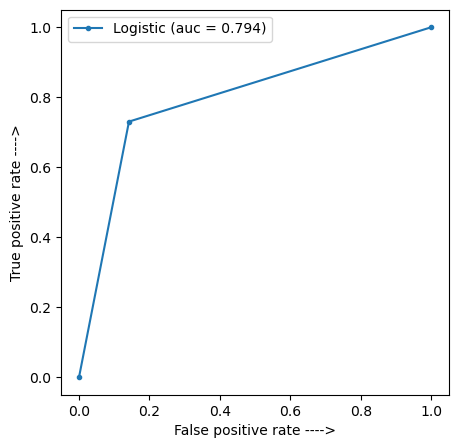

In [70]:
# ROC and AUC

from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold = roc_curve(y_test,pred_train)
print("FPR:",fpr,"\nTPR:",tpr,"\nThreshold:",threshold)

# AUC
auc = auc(fpr,tpr)
print("AUC : ",auc)

# Plotting ROC curve
plt.figure(figsize = (5,5), dpi=100)
plt.plot(fpr, tpr, marker='.', label = 'Logistic (auc = %0.3f)' % auc)
plt.xlabel('False positive rate ---->')
plt.ylabel('True positive rate ---->')
plt.legend()
plt.show()

In [ ]:
# Interview Questions:

# 1. What is the difference between precision and recall?

# In pattern recognition,information retrieval, object detection and classification(machine learning),
# precision and recall are performance metrics that apply to data retrieved from a collection, 
# corpus or sample space.

# Precision (also called positive predictive value) is the fraction of relevant instances among the 
# retrieved instances.
# Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 

In [ ]:
# 2. What is cross-validation, and why is it important in binary classification?

# Cross-validation is a technique for evaluating ML models by training several ML models on 
# subsets of the available input data and evaluating them on the complementary subset of the data. 
# Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

# The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained 
# too well on the training data and performs poorly on new, unseen data. 
# By evaluating the model on multiple validation sets, cross validation provides a more realistic 
# estimate of the model’s generalization performance, i.e., its ability to perform well on new, 
# unseen data.